<a href="https://colab.research.google.com/github/Ashahet1/Datascience/blob/main/BootCamp_Oreilly/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This code sets up display options, imports, etc.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

# set up plotting defaults
%matplotlib inline
set_matplotlib_formats("svg")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (4, 3)
pio.templates.default = "simple_white"

# display options for numpy and pandas
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lab 1: Pandas and Data Cleaning

**Data Science Bootcamp with Python, Pandas, and Plotly**

## Working with data tables in `pandas`

First, let's go over how to take notes.

In [6]:
# This is a code cell

### Subsetting and Filtering: NBA Salaries

In [7]:
import pandas as pd
import numpy as np

Let's load in salaries for NBA players in the '21-'22 season.

In [8]:
def data(csv):
    return f'https://github.com/DS-100/textbook/blob/master/content/datasets/{csv}?raw=true'

data('nba-2022.csv')

'https://github.com/DS-100/textbook/blob/master/content/datasets/nba-2022.csv?raw=true'

In [ ]:
nba = pd.read_csv(data('nba-2022.csv'))
nba = nba.set_index('Player')
nba

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


### What questions can we answer with this data?

### Subsetting

What is average Salary?

In [ ]:
nba['Salary'].std()
# this is same as using the loc

nba.loc[:, 'Salary'].mean()

9010810.482939633

Who is paid the most ?

In [ ]:
nba.sort_values('Salary', ascending=False).index[0]

'Stephen Curry'

In [ ]:
nba['Salary'].idxmax()
nba['Salary'].max()

45780966

What did Draymond Green get paid?

In [ ]:
nba.loc['Draymond Green', 'Salary']

24026712

In [ ]:
nba.loc[:, ['Position', 'Salary']]
nba.iloc[0:5, :]

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
Clint Capela,C,Atlanta Hawks,17103448
Delon Wright,SG,Atlanta Hawks,8526316


How many teams are there?

### Filtering

What is the avg Salary of Atlanta Hawks?

In [ ]:
len(nba['Team'].unique())

30

In [ ]:
nba['Team' ] == 'Atlanta Hawks'

,Team
Player,
John Collins,True
Danilo Gallinari,True
Bogdan Bogdanović,True
...,...
Raul Neto,False
Daniel Gafford,False
Anthony Gill,False


In [ ]:
nba[nba['Team' ] == 'Atlanta Hawks']['Salary'].mean()

10481282.0

In [ ]:
nba[nba['Salary'] > 40_00_000_0]

,Position,Team,Salary
Player,,,
James Harden,PG,Brooklyn Nets,43848000
Kevin Durant,PF,Brooklyn Nets,40918900
Stephen Curry,PG,Golden State Warriors,45780966
Russell Westbrook,PG,Los Angeles Lakers,44211146
LeBron James,SF,Los Angeles Lakers,41180544


In [ ]:
nba.query('Salary > 40_00_000_0')

,Position,Team,Salary
Player,,,
James Harden,PG,Brooklyn Nets,43848000
Kevin Durant,PF,Brooklyn Nets,40918900
Stephen Curry,PG,Golden State Warriors,45780966
Russell Westbrook,PG,Los Angeles Lakers,44211146
LeBron James,SF,Los Angeles Lakers,41180544


### Aggregating: Dog Breed Data

Fill this cell in with your questions.

In [ ]:
dogs = pd.read_csv(data('dogs43.csv'))
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [ ]:
dogs.set_index('weight')
# that column just become the first one and then rest column is as is..

,breed,kind,lifetime_cost,longevity,size,height
weight,,,,,,
35.0,Brittany,sporting,22589.0,12.92,medium,19.0
14.0,Cairn Terrier,terrier,21992.0,13.84,small,10.0
30.0,English Cocker Spaniel,sporting,18993.0,11.66,medium,16.0
...,...,...,...,...,...,...
115.0,Bullmastiff,working,13936.0,7.57,large,25.5
175.0,Mastiff,working,13581.0,6.50,large,30.0
155.0,Saint Bernard,working,20022.0,7.78,large,26.5


In [ ]:
dogs.assign(
    cost_per_year = dogs['lifetime_cost'] / dogs['longevity']
)


,breed,kind,lifetime_cost,longevity,size,weight,height,cost_per_year
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0,1748.37
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0,1589.02
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0,1628.90
...,...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5,1840.95
41,Mastiff,working,13581.0,6.50,large,175.0,30.0,2089.38
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5,2573.52


<Axes: xlabel='lifetime_cost', ylabel='longevity'>

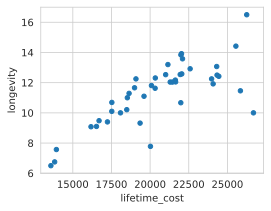

In [ ]:
dogs.plot(kind='scatter', x='lifetime_cost', y='longevity')

**What kinds of dogs live longer than others?**

In [ ]:
dogs.groupby('size')['longevity'].mean()
dogs.groupby('size')['longevity'].median()

,longevity
size,
large,9.48
medium,12.04
small,12.41


### Putting it all Together: Baby Names

#### Lilith, Lilibet … Lucifer? How Baby Names Went to ‘L’

https://archive.is/NpORG

### What are the claims made in the article?

Fill in this cell with your answers.

In [11]:
baby = pd.read_csv(data('babynames.csv'))
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


<Axes: xlabel='Year'>

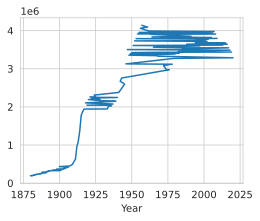

In [ ]:
baby.groupby('Year')['Count'].sum().sort_values().loc[:].plot()

<Axes: xlabel='Year'>

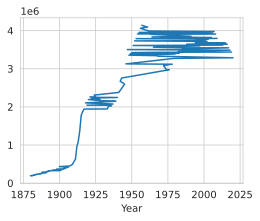

In [14]:
(baby
 .groupby('Year')['Count']
 .sum()
 .sort_values()
 .plot()
)

<Axes: xlabel='Year'>

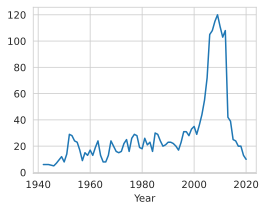

In [13]:
(baby
 [baby['Name'] == 'Siri']
 .groupby('Year')
 ['Count']
 .sum()
 .plot()
)

<Axes: xlabel='Year'>

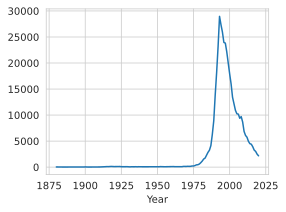

In [23]:
(baby
 [baby['Name'] == 'Taylor']
 .groupby('Year')
 ['Count']
 .sum()
 .plot()
)

In [15]:
nyt = pd.read_csv(data('nyt_names.csv'))
nyt

,nyt_name,category
0,Lucifer,forbidden
1,Lilith,forbidden
2,Danger,forbidden
...,...,...
20,Venus,celestial
21,Celestia,celestial
22,Skye,celestial


In [20]:
cat_names = baby.merge(nyt, left_on='Name', right_on='nyt_name')

<Axes: xlabel='Year'>

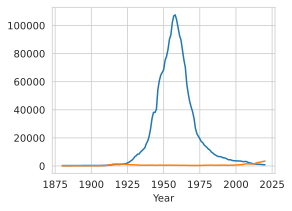

In [22]:
(cat_names
 [cat_names['category']== 'boomer']
 .groupby('Year')
 ['Count']
 .sum()
 .plot()
)

(cat_names
 [cat_names['category']== 'mythology']
 .groupby('Year')
 ['Count']
 .sum()
 .plot()
)

### Recap: Data table manipulation

## Data Cleaning

### CO2 Measurements on Mauna Loa

www.esrl.noaa.gov/gmd/ccgg/trends/

In [52]:
!wget --output-document "co2_mm_mlo.txt" "https://github.com/DS-100/textbook/blob/master/content/datasets/co2_mm_mlo.txt?raw=true" 2> /dev/null

In [53]:
!head co2_mm_mlo.txt

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# ensure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 


In [54]:
from pathlib import Path

lines = Path('co2_mm_mlo.txt').read_text().split('\n')
len(lines)

811

In [55]:
lines[:6]

['# --------------------------------------------------------------------',
 '# USE OF NOAA ESRL DATA',
 '# ',
 '# These data are made freely available to the public and the',
 '# scientific community in the belief that their wide dissemination',
 '# will lead to greater understanding and new scientific insights.']

In [56]:
lines[69:79]

['#',
 '#            decimal     average   interpolated    trend    #days',
 '#             date                             (season corr)',
 '1958   3    1958.208      315.71      315.71      314.62     -1',
 '1958   4    1958.292      317.45      317.45      315.29     -1',
 '1958   5    1958.375      317.50      317.50      314.71     -1',
 '1958   6    1958.458      -99.99      317.10      314.85     -1',
 '1958   7    1958.542      315.86      315.86      314.98     -1',
 '1958   8    1958.625      314.93      314.93      315.94     -1',
 '1958   9    1958.708      313.20      313.20      315.91     -1']

In [64]:
co2 = pd.read_csv('co2_mm_mlo.txt',
                   header=None, skiprows=72, sep='\s+', # Skip the first 72 descriptive row
                   names=['Yr', 'Mo', 'DecDate', 'Avg', 'Int', 'Trend', 'days'])  # Set column names

co2

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
...,...,...,...,...,...,...,...
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


<Axes: xlabel='DecDate'>

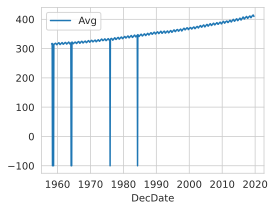

In [67]:
# Now you can plot the data
co2.plot(x='DecDate', y='Avg')

### Missing Data

In [69]:
import plotly.express as px
px.line(co2, x='DecDate', y='Avg')

### You Try:

Get all the recordings with missing CO2 data (where the Avg column is less than 0)

In [71]:
co2[co2['Avg'] < 0]

,Yr,Mo,DecDate,Avg,Int,Trend,days
3,1958,6,1958.46,-99.99,317.10,314.85,-1
7,1958,10,1958.79,-99.99,312.66,315.61,-1
71,1964,2,1964.12,-99.99,320.07,319.61,-1
72,1964,3,1964.21,-99.99,320.73,319.55,-1
73,1964,4,1964.29,-99.99,321.77,319.48,-1
213,1975,12,1975.96,-99.99,330.59,331.60,0
313,1984,4,1984.29,-99.99,346.84,344.27,2


In [72]:
# Don't worry about understanding this code for now, just look at the plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3,
    subplot_titles=("Missing Dropped",
                    "Missing Set to NaN", "Missing Interpolated"))

co2_small = (co2[co2['Avg'] > 0])[:8]

fig.add_trace(
    go.Scatter(x=co2_small['Mo'], y=co2_small['Avg'],
               mode='lines+markers'),
    row=1, col=1)

co2_na = (co2.replace(-99.99, np.NaN))[:10]

fig.add_trace(
    go.Scatter(x=co2_na['Mo'], y=co2_na['Avg'], mode='lines+markers'),
    row=1, col=2)

fig.add_trace(
    go.Scatter(x=co2_na['Mo'], y=co2_na['Int'], mode='lines+markers'),
    row=1, col=3)

fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=1)
fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=2)
fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=3)

fig.update_layout(height=350, margin=dict(t=30, b=0), showlegend=False)

fig.show()

### Granularity

In [73]:
co2

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
...,...,...,...,...,...,...,...
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


#### You Try:

Find the average CO2 for each year, then plot the CO2 vs. year

<Axes: xlabel='Yr'>

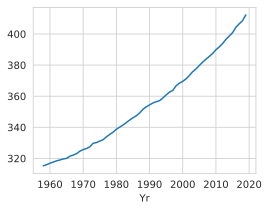

In [76]:
#px.line(co2, x='DecDate', y='Int')
co2.groupby('Yr')['Int'].mean().plot()

In [ ]:
fig = ...
fig.update_layout(showlegend=False)
fig

### Data Cleaning Principles

Data Quality (look at the values)
  - scope: do your data match your understanding of the population?
  - measurements and values: are your values reasonable?
  - relationships: are relationationship relatable?
  - analysis : which features in future are helpful?
  - missing values
    - understand WHY values are missing?
    - imputation
      - deductive
      - probablistic / multiple imputation
  - transformations
   - type ('$5.7' to 5.7)
   - maths transform
   - extract
   - timestamps
  - structures
   - simplify
   - granularity (aggregating)
   - reshape (wide to long)

## Case Study: Restaurant Safety Violations

https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i

In [77]:
# businesses
bus = pd.read_csv(data('SF_Restaurant_Inspections/businesses.csv'), encoding='ISO-8859-1')

# inspections
insp = pd.read_csv(data('SF_Restaurant_Inspections/inspections.csv'))

# violations
viol = pd.read_csv(data('SF_Restaurant_Inspections/violations.csv'))

In [78]:
bus

,business_id,name,address,city,...,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,...,94109,37.79,-122.42,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,...,94104,37.79,-122.40,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,...,94133,37.81,-122.42,NaN
...,...,...,...,...,...,...,...,...,...
6403,94571,THE PHOENIX PASTIFICIO,200 CLEMENT ST,San Francisco,...,94118,NaN,NaN,+14154726100
6404,94572,BROADWAY DIM SUM CAFE,684 BROADWAY ST,San Francisco,...,94133,NaN,NaN,NaN
6405,94574,BINKA BITES,2241 GEARY BLVD,San Francisco,...,94115,NaN,NaN,+14157712907


### Check Data Quality

#### You Try:

Write Python code to explore the `'postal_code'` column in `bus`. Find at least two issues.

In [80]:
bus['postal_code'].apply(type).value_counts()


,count
postal_code,
<class 'str'>,6166
<class 'float'>,240


In [82]:
# issue 1: Inconsistent length of postan code
# issue 2: Missing values of postal number Nan
bus[bus['postal_code'].str.len() != 5]  # Assuming U.S. 5-digit postal codes



,business_id,name,address,city,...,postal_code,latitude,longitude,phone_number
1209,5200,LATINO CUISINE CULINARY ACADEMY,2929 19TH ST,San Francisco,...,941102019,37.76,-122.41,+14156485220
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,...,941,37.81,-122.44,+14153462628
1534,6029,ALEXIS APARTMENTS SR. MEALS PROGRAM,390 CLEMENTINA ST,San Francisco,...,941033148,NaN,NaN,+14154959541
...,...,...,...,...,...,...,...,...,...
6240,93029,BAHN MI ZON,OFF THE GRID,San Francisco,...,NaN,NaN,NaN,+14152414342
6354,94123,BON APPETIT @ AIRBNB,999 BRANNAN ST,San Francisco,...,NaN,NaN,NaN,+1415 Alieri
6387,94409,AUGUST HALL,420 MASON ST,San Francisco,...,NaN,NaN,NaN,NaN


In [ ]:
...

In [ ]:
...

### Look for Missing Data

#### You Try:

How many rows in `bus` have missing values for `'postal_code'`?

In [83]:
# check up

### Transform Data

In [84]:
insp

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
...,...,...,...,...
14219,94142,100,20171220,routine
14220,94189,96,20171130,routine
14221,94231,85,20171214,routine


https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [85]:
dates = ...
dates

Ellipsis

In [86]:
def parse_dates_and_years(df):
    dates = pd.to_datetime(df['date'], format='%Y%m%d')
    years = dates.dt.year
    return df.assign(timestamp=dates, year=years)

def subset_2016(df):
    return df.query('year == 2016')

# inspections
ins2016 = (insp
           .pipe(parse_dates_and_years)
           .pipe(subset_2016))

# violations
vio2016 = (viol
           .pipe(parse_dates_and_years)
           .pipe(subset_2016))

#### You Try:

Use `vio2016` to create a dataframe called `num_vios` that has one row per inspection. It should have three columns:

- `business_id`: The business ID.
- `timestamp`: The date of the inspection.
- `num_vio`: The total number of violations the inspection recorded on that date.

The resulting dataframe should have 4806 rows.

In [91]:
num_vios = vio2016.groupby(['business_id', 'timestamp'])['business_id'].count().reset_index(name='num_vio')
# rename
num_vios = num_vios.rename(columns={'violation_id': 'num_violations'})
num_vios

,business_id,timestamp,num_vio
0,19,2016-05-13,3
1,24,2016-03-11,2
2,24,2016-10-05,1
...,...,...,...
4803,89790,2016-11-29,1
4804,89900,2016-12-06,1
4805,90096,2016-12-29,2


In [92]:
ins_and_num_vios = ins2016.merge(num_vios, on=['business_id', 'timestamp'], how='left')
ins_and_num_vios

,business_id,score,date,type,timestamp,year,num_vio
0,19,94,20160513,routine,2016-05-13,2016,3.0
1,24,98,20161005,routine,2016-10-05,2016,1.0
2,24,96,20160311,routine,2016-03-11,2016,2.0
...,...,...,...,...,...,...,...
5440,90096,91,20161229,routine,2016-12-29,2016,2.0
5441,90268,100,20161229,routine,2016-12-29,2016,NaN
5442,90269,100,20161229,routine,2016-12-29,2016,NaN


In [93]:
ins_and_num_vios['num_vio'].isnull().sum()

833

In [94]:
px.box(ins_and_num_vios, x="num_vio", y="score")

### Do certain kinds of violations impact safety score more than others?

In [95]:
vio2016['description'].value_counts().head(15).to_frame()

,count
description,
Unclean or degraded floors walls or ceilings,161
Unapproved or unmaintained equipment or utensils,99
Moderate risk food holding temperature,95
...,...
Improper storage of equipment utensils or linens,41
Permit license or inspection report not posted,41
Low risk vermin infestation,34


In [96]:
from IPython.display import display
with pd.option_context("display.max_rows", 15):
    display(vio2016['description'].value_counts().head(15).to_frame())

,count
description,
Unclean or degraded floors walls or ceilings,161
Unapproved or unmaintained equipment or utensils,99
Moderate risk food holding temperature,95
Inadequate and inaccessible handwashing facilities,93
Inadequately cleaned or sanitized food contact surfaces,92
Improper food storage,81
Wiping cloths not clean or properly stored or inadequate sanitizer,71
Food safety certificate or food handler card not available,64
Moderate risk vermin infestation,58


In [97]:
def make_vio_categories(vio):
    def has(term):
        return vio['description'].str.contains(term)

    return vio[['business_id', 'timestamp']].assign(
        high_risk        = has(r"high risk"),
        clean            = has(r"clean|sanit"),
        food_surface     = (has(r"surface") & has(r"\Wfood")),
        vermin           = has(r"vermin"),
        storage          = has(r"thaw|cool|therm|storage"),
        permit           = has(r"certif|permit"),
        non_food_surface = has(r"wall|ceiling|floor|surface"),
        human            = has(r"hand|glove|hair|nail"),
    )

In [98]:
# The violations with the new categories.
# `vio_ctg` is short for `violation categories`.
vio_ctg = vio2016.pipe(make_vio_categories)
vio_ctg

,business_id,timestamp,high_risk,clean,...,storage,permit,non_food_surface,human
2,19,2016-05-13,False,False,...,False,False,False,False
3,19,2016-05-13,False,True,...,False,False,True,False
4,19,2016-05-13,False,False,...,False,True,False,True
...,...,...,...,...,...,...,...,...,...
38147,89900,2016-12-06,False,False,...,False,False,False,False
38220,90096,2016-12-29,False,False,...,False,False,False,False
38221,90096,2016-12-29,False,True,...,False,False,True,False


In [99]:
# Need to change granularity
vio_counts = vio_ctg.groupby(['business_id', 'timestamp']).sum().reset_index()
vio_counts

,business_id,timestamp,high_risk,clean,...,storage,permit,non_food_surface,human
0,19,2016-05-13,0,1,...,0,1,1,1
1,24,2016-03-11,0,2,...,0,0,2,0
2,24,2016-10-05,0,1,...,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4803,89790,2016-11-29,0,0,...,0,0,0,1
4804,89900,2016-12-06,0,0,...,0,0,0,0
4805,90096,2016-12-29,0,1,...,0,0,1,0


In [100]:
feature_names = ['high_risk', 'clean', 'food_surface', 'vermin',
                 'storage', 'permit', 'non_food_surface', 'human']

def left_join_features(ins):
    return (ins[['business_id', 'timestamp', 'score']]
            .merge(vio_counts, on=['business_id', 'timestamp'], how='left'))

def zero_features_for_perfect_scores(ins):
    ins = ins.copy()
    ins.loc[ins['score'] == 100, feature_names] = 0
    return ins

In [101]:
ins_and_vios = (ins2016.pipe(left_join_features)
                .pipe(zero_features_for_perfect_scores))
ins_and_vios.head(3)

,business_id,timestamp,score,high_risk,...,storage,permit,non_food_surface,human
0,19,2016-05-13,94,0.0,...,0.0,1.0,1.0,1.0
1,24,2016-10-05,98,0.0,...,0.0,0.0,1.0,0.0
2,24,2016-03-11,96,0.0,...,0.0,0.0,2.0,0.0
